## Velocity, Acceleration, Jerk and Snap? 
#### _Identifying Hidden Signals of Market Change with Optimized Multivariate-Multi Step MLPs, LSTMs and CNNs for Time Series Modeling of Higher Order Motion Derivatives in Physics and Their Relationship to Interestingness metric by ?_
Brian Griner and Thomas Ball

### Introduction
This is a collaborative work in progress to explore how concepts in the physical world like velocity, jerk and other higher order derivatives of motion used in physics might help us identify early signals of  marketplace activity that are eventually revealed in patterns of change in the interestingness metric at different periods.
### Data
Interestingness metric measured monthly from the end of 2009 to mid 2019.
### Methodology
*   **MODELS:** Multivariate multi step sequence models (specifically Multi Layer Perceptrons, Long Short Term Memory networks and Convolutional Neural Networks) are developed on training and validation samples. 
*   **TUNING:** Model hyper parameters are optimized using a full factorial experimental design with 2 to 3 levels for each hyper parameter.  
Callbacks  are used for early stopping of training when the mean squared error of the validation sample does not improve over a specified number of training epochs. The _patience_ of the early stopping callback (number of completed epoches before training is terminated) is also tested as a hyper parameter in the experimental design. Additional tuning methods tested include: input and reccurrent dropout, weight and kernel regularization.
*   **TESTING:** Model performance is tested using the Test sample after hyper parameter tuning.  The best model from the tuning phase is used to predict the last 12 months of the Interesting metric. Several performance metrics are calculated on the Mean Squared Error of the difference between the predicted and actual prices in the Test sample. (TOM TO ADD DETAILS ON METRICS HERE) 
### Results
This is part of a larger study of which this analysis is only one part. To be continued...
### Insights & Discussion
TBD


**1. Load data from local device using colab import files upload method**

In [0]:
# import colab files method and upload data
from google.colab import files
files.upload()

Saving Data.txt to Data.txt


{'Data.txt': b'DATE\tDEPENDENT VARIABLE\tFIRST\tSECOND\tTHIRD\tFOURTH\r\n2009-11\t25\t2.25\t2.15\t2.14\t1.76\r\n2009-12\t22\t1.92\t1.72\t1.62\t1.53\r\n2010-01\t23\t2.01\t2.05\t2.29\t2.63\r\n2010-02\t29\t2.22\t2.21\t2.16\t1.86\r\n2010-03\t53\t2.76\t2.68\t2.63\t2.63\r\n2010-04\t65\t2.80\t2.63\t2.54\t2.50\r\n2010-05\t63\t2.71\t2.66\t2.78\t2.99\r\n2010-06\t57\t2.62\t2.63\t2.69\t2.63\r\n2010-07\t53\t2.57\t2.60\t2.61\t2.57\r\n2010-08\t52\t2.57\t2.59\t2.58\t2.56\r\n2010-09\t48\t2.50\t2.50\t2.49\t2.48\r\n2010-10\t46\t2.48\t2.50\t2.51\t2.54\r\n2010-11\t42\t2.40\t2.41\t2.40\t2.37\r\n2010-12\t41\t2.40\t2.42\t2.43\t2.45\r\n2011-01\t45\t2.49\t2.50\t2.48\t2.45\r\n2011-02\t100\t3.27\t3.24\t3.21\t3.20\r\n2011-03\t65\t2.65\t2.46\t2.29\t2.16\r\n2011-04\t42\t2.31\t2.41\t2.70\t3.15\r\n2011-05\t46\t2.51\t2.62\t2.63\t2.36\r\n2011-06\t50\t2.57\t2.55\t2.41\t2.26\r\n2011-07\t40\t2.32\t2.30\t2.31\t2.44\r\n2011-08\t39\t2.36\t2.42\t2.50\t2.58\r\n2011-09\t29\t2.07\t2.08\t2.02\t1.89\r\n2011-10\t29\t2.15\t2.24\t2.31

### **Read Interestingness Dataset**

Index(['DATE', 'DEPENDENT VARIABLE', 'FIRST', 'SECOND', 'THIRD', 'FOURTH'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 116 entries, 2009-11 to 2019-06
Data columns (total 6 columns):
DATE                  116 non-null object
DEPENDENT VARIABLE    116 non-null int64
FIRST                 116 non-null float64
SECOND                116 non-null float64
THIRD                 116 non-null float64
FOURTH                116 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 6.3+ KB
None
N size: 116
            DATE  DEPENDENT VARIABLE  FIRST  SECOND  THIRD  FOURTH
DATE                                                              
2009-11  2009-11                  25   2.25    2.15   2.14    1.76
2009-12  2009-12                  22   1.92    1.72   1.62    1.53
2010-01  2010-01                  23   2.01    2.05   2.29    2.63
2010-02  2010-02                  29   2.22    2.21   2.16    1.86
2010-03  2010-03                  53   2.76    2.68   2.63    2

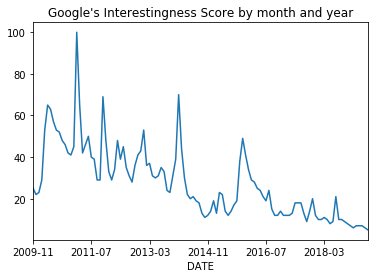

In [0]:
# LARGE DATASET - stocks.txt 

# import libs
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# set numeric format
pd.options.display.float_format = '{:,.2f}'.format

# create data objects 
iscore = pd.read_csv('Data.txt',sep='\t')  # ,index_col='DATE')  # ,usecols=range(0,10))
pd.to_datetime(iscore['DATE'], format='%Y-%m')

# Set index
iscore.set_index('DATE', inplace=True, drop=False)

# check columns & dtypes
print(iscore.columns)
print(iscore.info())
print(f'N size: {len(iscore)}') 
print(iscore.head())
print(iscore.tail())
print(iscore.describe())

# plot iscore
iscore['DEPENDENT VARIABLE'].plot(title="Google's Interestingness Score by month and year")
plt.show()

Number months: 96


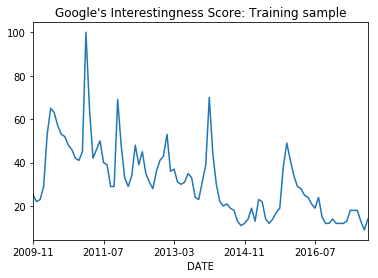

In [0]:
# Subset data around peak
peak_iscore1b = iscore['2009-11': '2017-10']
# number of months
print(f'Number months: {len(peak_iscore1b)}')
# plot peak periods
peak_iscore1b['DEPENDENT VARIABLE'].plot(title="Google's Interestingness Score: Training sample")

Historical events in February of 2011 include: Nicki Manaj number 1 on Billboard 200, Arab Spring begins, Maya Angelou wins Presidential Metal of Freedom, Kobe Bryant named MVP in NBA All-Star Game where West beats East, Natalie Portman and Colin Firth win Academy Awards for The King's Speech.

[February 2011 - Historical Events On This Day](https://www.onthisday.com/events/date/2011/february)

Historical events in December of 2011 include: Game show host Alex Trebec heart attack, Baseball legend Barry Bonds sentenced to house arrest for drug use, French president Jacque Chirac convicted of diverting public funds.

[December 2011 - Historical Events On This Day](https://www.onthisday.com/events/date/2011/december)

Number months: 8
AxesSubplot(0.125,0.125;0.775x0.755)


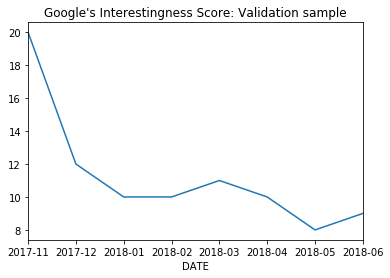

In [0]:
# Subset data around peaks for validation sample
iscore_val = iscore['2017-11': '2018-06']
# number of months 
print(f'Number months: {len(iscore_val)}')
# plot peak periods
print(iscore_val['DEPENDENT VARIABLE'].plot(title="Google's Interestingness Score: Validation sample"))

Historical events in December of 2015 include: Trump proposes US muslim ban, Angela Merkel named Time's Person of the Year, Star Wars: The Force Awakens premiere.

[December 2015 - Historical Events On This Day](https://www.onthisday.com/events/date/2015/december)

Number months: 12
AxesSubplot(0.125,0.125;0.775x0.755)


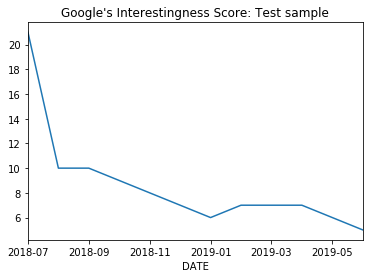

In [0]:
# Subset data around peak
iscore_test = iscore['2018-07': '2019-06']
# number of months around peak
print(f'Number months: {len(iscore_test)}')
# plot peak periods
print(iscore_test['DEPENDENT VARIABLE'].plot(title="Google's Interestingness Score: Test sample"))

Historical events in September of 2018 include: Senator John McCain and Aretha Franklin memorial services, NFL player Colin Kaepernick new face of Nike, Brazilian president Jair Bolsonaro stabbed at campaign rally, Nicki Minaj and Cardi B fist fight, Dokovic wins US Men's Tenis Open championship, UN Secretary General Kofi Annan funeral, Pope Francis meeting with church leaders to discuss sexual abuse, Singer Rihanna appointed as an ambassador for Barbados, Indian Prime Minister Narendra Modi launches Modicare as world's largest free healthcare program for 500 million people, Comedian Bill Cosby sentenced to 3-10 years for sexual assault, Trump bans Iran from speaking at UN General Assembly, Elon Musk accused of securities fraud.

[September 2018 - Historical Events On This Day](https://www.onthisday.com/events/date/2018/september)

## Create Loop for All Tickers

### Interestingness: Multivariate - Multi step LSTM with Early Stopping Callbacks

Number of input time steps: 3
Number of output time steps: 2
Number Model of Features: 4
N size: df_train, df_val, df_test =  96 8 12


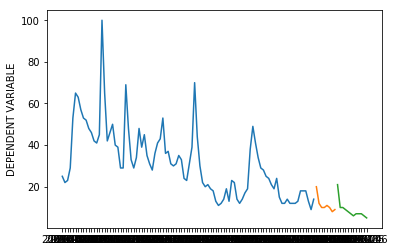

all_df N size: 116
train_df N size: 96
val_df N size: 8
test_df N size: 12
Shape of input/output samples: X_train (113, 3, 4), y_train (113, 2)
Shape of input/output samples: X_train (93, 3, 4), y_train (93, 2)
Shape of input/output samples: X_val (5, 3, 4), y_val (5, 2)
Shape of input/output samples: X_test (9, 3, 4), y_test (9, 2)
Train on 93 samples, validate on 5 samples
Epoch 1/25
93/93 [==============================] - 7s 78ms/step - loss: 0.4381 - mean_squared_error: 0.4381 - val_loss: 0.1079 - val_mean_squared_error: 0.1079
Epoch 2/25
93/93 [==============================] - 2s 23ms/step - loss: 0.1914 - mean_squared_error: 0.1914 - val_loss: 0.1400 - val_mean_squared_error: 0.1400
Epoch 3/25
93/93 [==============================] - 2s 23ms/step - loss: 0.2173 - mean_squared_error: 0.2173 - val_loss: 0.1100 - val_mean_squared_error: 0.1100
Epoch 4/25
93/93 [==============================] - 2s 24ms/step - loss: 0.1295 - mean_squared_error: 0.1295 - val_loss: 0.0884 - val_mean_

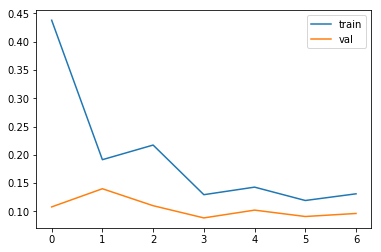

N size: y_pred_df  113
[1.6094121 1.7707561 2.024343  2.1660137 2.0300136 1.9246827 1.8735499
 1.8761462 1.9134657 1.8656114 1.8732864 1.8467464 1.9152596 1.6185971
 2.3415513 1.7847415 1.6978348 1.9908487 1.9549986 1.768956  1.823722
 1.6953658 1.8055906 2.3146162 1.7086242 1.6519675 1.8019375 1.9974188
 2.1193304 1.785901  1.9803802 1.7228565 1.7473377 1.817824  2.0113301
 2.0120206 1.9481899 2.0380473 1.6943144 1.8633927 1.7536963 1.7954928
 1.8620985 1.8967669 1.7295204 1.5944773 1.7640489 2.0147693 1.9328657
 2.2792466 1.6571647 1.5824547 1.5341288 1.5896293 1.6058534 1.5359862
 1.4791734 1.4149479 1.4542927 1.5030295 1.6158558 1.5579866 1.5849518
 1.7592615 1.5086058 1.3664719 1.5023197 1.5782646 1.6463608 1.9190707
 2.2410479 2.094458  1.7690159 1.7417885 1.7264627 1.695268  1.6368
 1.6194743 1.5502567 1.6327856 1.6231772 1.349172  1.4590181 1.5073432
 1.4886483 1.4649343 1.4664732 1.4878684 1.5861338 1.6424013 1.5773824
 1.5007232 1.3846759 1.4524347 1.615907  1.5483319 1.34806

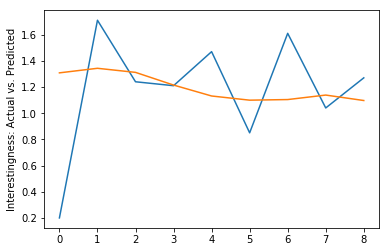

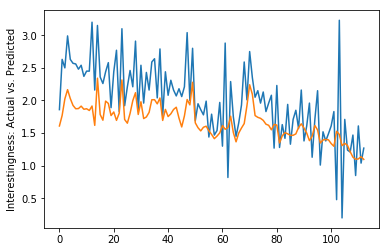

Root Mean Squared Error: 0.514
Mean Squared Error: 0.264
Mean Absolute Error: 0.433
Median Absolute Error: 0.446
Explained Variance: 0.498
R^2: -0.171
Root Mean Squared Error: 0.206
Mean Squared Error: 0.042
Mean Absolute Error: 0.170
Median Absolute Error: 0.125
Explained Variance: 0.047
R^2: 0.032
Root Mean Squared Error: 0.452
Mean Squared Error: 0.204
Mean Absolute Error: 0.324
Median Absolute Error: 0.249
Explained Variance: -0.113
R^2: -0.114
Root Mean Squared Error: 0.529
Mean Squared Error: 0.279
Mean Absolute Error: 0.428
Median Absolute Error: 0.368
Explained Variance: 0.490
R^2: 0.152
df_pred_df N size: 113
  SAMPLE MODEL     DATE  Pred_Interestingness
0    all  LSTM  2010-02                  1.61
1    all  LSTM  2010-03                  1.77
2    all  LSTM  2010-04                  2.02
3    all  LSTM  2010-05                  2.17
4    all  LSTM  2010-06                  2.03
    SAMPLE MODEL     DATE  Pred_Interestingness
108    all  LSTM  2019-02                  1.13
10

In [0]:
# 0. import libs
from pandas import DataFrame
import numpy as np
from numpy import array
from sklearn.metrics import explained_variance_score,r2_score,mean_squared_error,mean_absolute_error,median_absolute_error 
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.regularizers import L1L2
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
from matplotlib import pyplot

# 1. funcs

# a. train, val, test split func

def timeseries_train_val_test_split(df,dcol,pcol,cols,train_end,val_end):
  "Use to create static train, val and test samples for timeseries."
  # select one stock ticker
  # df1 = df.loc[df[fcol]==fval].set_index(dcol)
  # select inputs & output
  inoutcols = cols  # ['LOGPRICE','FIRST DERIVATIVE','SECOND DERIVATIVE','THIRD DERIVATIVE','FOURTH DERIVATIVE']
  # select train, validation and test data
  df, df_train, df_val, df_test = df[inoutcols], df[:train_end] [inoutcols], df[train_end:val_end] [inoutcols], df[val_end:] [inoutcols]
  print('N size: df_train, df_val, df_test = ',len(df_train),len(df_val), len(df_test))
  # plot train, val and test data
  plt.plot(df_train[pcol])
  plt.plot(df_val[pcol]) 
  plt.plot(df_test[pcol])
  plt.ylabel(pcol)
  plt.show()
  return df, df_train, df_val, df_test


# b. multivariate multi-step data preparation func

def df2samples(df,train_df,val_df,test_df,n_steps_in=3,n_steps_out=2):
  "Transform stacked timeseries to sequence samples."
  # convert to np array
  df_ar = df.to_numpy()
  train_ar = train_df.to_numpy()
  val_ar = val_df.to_numpy() 
  test_ar = test_df.to_numpy()
  '''print('train array dimensions')
  print(train_ar.shape)
  print('validation array dimensions')
  print(val_ar.shape)
  print('test array dimensions')
  print(test_ar.shape)'''
  # split a multivariate arrays into sequence samples
  def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
      # find the end of this pattern
      end_ix = i + n_steps_in
      out_end_ix = end_ix + n_steps_out-1
      # check if we are beyond the dataset
      if out_end_ix > len(sequences):
        break
      # gather input and output parts of the pattern
      seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
      X.append(seq_x)
      y.append(seq_y)
    return array(X), array(y)
  # create train, val, test samples
  X_df, y_df = split_sequences(df_ar, n_steps_in, n_steps_out)
  X_train, y_train = split_sequences(train_ar, n_steps_in, n_steps_out)
  X_val, y_val = split_sequences(val_ar, n_steps_in, n_steps_out)
  X_test, y_test = split_sequences(test_ar, n_steps_in, n_steps_out)
  return X_df, y_df, X_train, y_train, X_val, y_val, X_test, y_test


# c. multivariate multi-step lstm

# model definition, fit, eval, predict
def model_def_fit_eval(X_df,y_df,X_train,y_train,X_val,y_val,X_test,y_test,n_nodes=200,n_epochs=100,n_patience=2,dropout=.5,reg=L1L2(l1=0.0, l2=0.0)):  # ,wts_fpath,n_nodes=200,n_epochs=100,n_patience=2):
  "Define and Fit Model + Tune Hyper Parameters: n_nodes, n_epochs, n_patience"
  # model define
  model = Sequential()
  model.add(LSTM(n_nodes,activation='relu',return_sequences=True,input_shape=(nsteps_input,nfeatures),dropout=dropout,kernel_regularizer=reg))  # dropout=dropout))
  model.add(LSTM(n_nodes,activation='relu'))
  model.add(Dense(nsteps_output))
  # model compile
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
  
  # early stopping
  early_stop = EarlyStopping(monitor='val_loss', patience=n_patience, verbose=1)
  # checkpoint
  # filepath="weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
  # filepath= wts_fpath
  # checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
  callbacks_list = [early_stop]  #, checkpoint]
  
  # model fit
  history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=n_epochs,batch_size=1,verbose=1,callbacks=callbacks_list,shuffle=False)
  # hyper parameter values
  print(f'Number of nodes in the hidden layer: {n_nodes}')
  print(f'Number of epoches: {n_epochs}')
  # print(f'Patience: Epochs before early stop: {n_patience}')
  # model evaluate
  _, train_mse = model.evaluate(X_train, y_train, verbose=0)
  _, val_mse = model.evaluate(X_val, y_val, verbose=0)
  print(f'Train: {train_mse:.6f}, Validation: {val_mse:.6f}')
  
  # plot accuracy of model learning
  pyplot.plot(history.history['mean_squared_error'], label='train')
  pyplot.plot(history.history['val_mean_squared_error'], label='val')
  pyplot.legend()
  pyplot.show()
  
  # model predict df
  yhat_df = model.predict(X_df, verbose=0)
  # print('yhat_train: ', yhat_train)
  # predicted: select last step of predicted multistep output
  y_pred_df = np.asarray([x[-1] for x in yhat_df])
  print('N size: y_pred_df ', len(y_pred_df))
  print(y_pred_df)
  # actual: select last step of actual multistep output
  y_actual_df = np.asarray([x[-1] for x in y_df])
  print('N size: y_actual_df ', len(y_actual_df))
  print(y_actual_df)
  
  # model predict train
  yhat_train = model.predict(X_train, verbose=0)
  # print('yhat_train: ', yhat_train)
  # predicted: select last step of predicted multistep output
  y_pred_train = np.asarray([x[-1] for x in yhat_train])
  print('N size: y_pred_train ', len(y_pred_train))
  print(y_pred_train)
  # actual: select last step of actual multistep output
  y_actual_train = np.asarray([x[-1] for x in y_train])
  print('N size: y_actual_train ', len(y_actual_train))
  print(y_actual_train)
  
  # model predict val
  yhat_val = model.predict(X_val, verbose=0)
  # print('yhat_val: ', yhat_val)
  # predicted: select last step of predicted multistep output
  y_pred_val = np.asarray([x[-1] for x in yhat_val])
  print('N size: y_pred_val ', len(y_pred_val))
  print(y_pred_val)
  # actual: select last step of actual multistep output
  y_actual_val = np.asarray([x[-1] for x in y_val])
  # print('y_actual_val: ', y_actual_val)
  print('N size: y_actual_val ', len(y_actual_val))
  print(y_actual_val)
  
  # model predict test
  yhat_test = model.predict(X_test, verbose=0)
  # print('yhat_test: ', yhat_test)
  # predicted: select last step of predicted multistep output
  y_pred_test = np.asarray([x[-1] for x in yhat_test])
  # print('y_pred_test: ', y_pred_test)
  print('N size: y_pred_test ', len(y_pred_test))
  print(y_pred_test)
  # actual: select last step of actual multistep output
  y_actual_test = np.asarray([x[-1] for x in y_test])
  # print('y_actual_test: ', y_actual_test)
  print('N size: y_actual_test ', len(y_actual_test))
  print(y_actual_test)
  
  # plot actual & predicted y on test
  plt.plot(y_actual_test)
  plt.plot(y_pred_test)
  plt.ylabel('Interestingness: Actual vs. Predicted')
  plt.show()  
  
  # plot actual & predicted y on df
  plt.plot(y_actual_df)
  plt.plot(y_pred_df)
  plt.ylabel('Interestingness: Actual vs. Predicted')
  plt.show()
  
  
  # e. model performance metrics
  
  # train
  "Use weights from best model to predict test sample."
  # import error metrics from sklearn
  from sklearn.metrics import explained_variance_score,r2_score,mean_squared_error,mean_absolute_error,median_absolute_error
  # compute root mean squared error of predictions
  rmse = np.sqrt(np.mean(np.square((y_actual_train - y_pred_train)),axis=0))
  print(f'Root Mean Squared Error: {rmse:.3f}')
  # compute mean squared error
  mae = mean_squared_error(y_actual_train, y_pred_train)
  print(f'Mean Squared Error: {mae:.3f}')
  # compute mean absolute error
  mae = mean_absolute_error(y_actual_train, y_pred_train)
  print(f'Mean Absolute Error: {mae:.3f}')
  # compute median absolute error
  mdae = median_absolute_error(y_actual_train, y_pred_train)
  print(f'Median Absolute Error: {mdae:.3f}')
  # compute explained_variance_score
  evar = explained_variance_score(y_actual_train, y_pred_train)
  print(f'Explained Variance: {evar:.3f}')
  # compute R2
  r2 = r2_score(y_actual_train, y_pred_train)
  print(f'R^2: {r2:.3f}')
  
  # val
  "Use weights from best model to predict test sample."
  # import error metrics from sklearn
  from sklearn.metrics import explained_variance_score,r2_score,mean_squared_error,mean_absolute_error,median_absolute_error
  # compute root mean squared error of predictions
  rmse = np.sqrt(np.mean(np.square((y_actual_val - y_pred_val)),axis=0))
  print(f'Root Mean Squared Error: {rmse:.3f}')
  # compute mean squared error
  mae = mean_squared_error(y_actual_val, y_pred_val)
  print(f'Mean Squared Error: {mae:.3f}')
  # compute mean absolute error
  mae = mean_absolute_error(y_actual_val, y_pred_val)
  print(f'Mean Absolute Error: {mae:.3f}')
  # compute median absolute error
  mdae = median_absolute_error(y_actual_val, y_pred_val)
  print(f'Median Absolute Error: {mdae:.3f}')
  # compute explained_variance_score
  evar = explained_variance_score(y_actual_val, y_pred_val)
  print(f'Explained Variance: {evar:.3f}')
  # compute R2
  r2 = r2_score(y_actual_val, y_pred_val)
  print(f'R^2: {r2:.3f}')
  
  # test
  "Use weights from best model to predict test sample."
  # import error metrics from sklearn
  from sklearn.metrics import explained_variance_score,r2_score,mean_squared_error,mean_absolute_error,median_absolute_error
  # compute root mean squared error of predictions
  rmse = np.sqrt(np.mean(np.square((y_actual_test - y_pred_test)),axis=0))
  print(f'Root Mean Squared Error: {rmse:.3f}')
  # compute mean squared error
  mae = mean_squared_error(y_actual_test, y_pred_test)
  print(f'Mean Squared Error: {mae:.3f}')
  # compute mean absolute error
  mae = mean_absolute_error(y_actual_test, y_pred_test)
  print(f'Mean Absolute Error: {mae:.3f}')
  # compute median absolute error
  mdae = median_absolute_error(y_actual_test, y_pred_test)
  print(f'Median Absolute Error: {mdae:.3f}')
  # compute explained_variance_score
  evar = explained_variance_score(y_actual_test, y_pred_test)
  print(f'Explained Variance: {evar:.3f}')
  # compute R2
  r2 = r2_score(y_actual_test, y_pred_test)
  print(f'R^2: {r2:.3f}')
  
  # df
  "Use weights from best model to predict test sample."
  # import error metrics from sklearn
  from sklearn.metrics import explained_variance_score,r2_score,mean_squared_error,mean_absolute_error,median_absolute_error
  # compute root mean squared error of predictions
  rmse = np.sqrt(np.mean(np.square((y_actual_df - y_pred_df)),axis=0))
  print(f'Root Mean Squared Error: {rmse:.3f}')
  # compute mean squared error
  mae = mean_squared_error(y_actual_df, y_pred_df)
  print(f'Mean Squared Error: {mae:.3f}')
  # compute mean absolute error
  mae = mean_absolute_error(y_actual_df, y_pred_df)
  print(f'Mean Absolute Error: {mae:.3f}')
  # compute median absolute error
  mdae = median_absolute_error(y_actual_df, y_pred_df)
  print(f'Median Absolute Error: {mdae:.3f}')
  # compute explained_variance_score
  evar = explained_variance_score(y_actual_df, y_pred_df)
  print(f'Explained Variance: {evar:.3f}')
  # compute R2
  r2 = r2_score(y_actual_df, y_pred_df)
  print(f'R^2: {r2:.3f}')
  
  # export results to csv
  
  # dfs
  # df_actual_train = pd.DataFrame(y_actual_train)
  df_pred_df = pd.DataFrame(y_pred_df)
  # labels
  df_date_df = pd.DataFrame(df.index[-113:])
  # df_ticker_train = pd.DataFrame([ticker]*172) 
  df_model_type_df = pd.DataFrame([model_type]*113)
  df_sample_type_df = pd.DataFrame(['all']*113)
  # concatenate y actual pred arrays
  df_pred_df = pd.concat((df_sample_type_df,df_model_type_df,df_date_df,df_pred_df), axis=1)
  df_pred_df.columns = ['SAMPLE','MODEL','DATE','Pred_Interestingness']
  print(f'df_pred_df N size: {len(df_pred_df)}')
  print(df_pred_df.head())
  print(df_pred_df.tail())

  # train dfs
  '''
  # df_actual_train = pd.DataFrame(y_actual_train)
  df_pred_train = pd.DataFrame(y_pred_train)
  # labels
  df_date_train = pd.DataFrame(train_df.index[-93:])
  # df_ticker_train = pd.DataFrame([ticker]*172) 
  df_model_type_train = pd.DataFrame([model_type]*93)
  df_sample_type_train = pd.DataFrame(['train']*93)
  # concatenate y actual pred arrays
  df_pred_train = pd.concat((df_sample_type_train,df_model_type_train,df_date_train,df_pred_train), axis=1)
  # df_actual_pred_train.columns = ['SAMPLE','MODEL','TICKER','DATE','LOGPRICE','Pred_LOGPRICE']
  print(f'df_pred_train N size: {len(df_pred_train)}')
  print(df_pred_train.head())
  print(df_pred_train.tail())
  
  # val dfs
  # df_actual_val = pd.DataFrame(y_actual_val)
  df_pred_val = pd.DataFrame(y_pred_val)
  # labels
  df_date_val = pd.DataFrame(val_df.index [-5:])
  # df_ticker_val = pd.DataFrame([ticker]*8) 
  df_model_type_val = pd.DataFrame([model_type]*5)
  df_sample_type_val = pd.DataFrame(['val']*5)
  # concatenate y actual pred arrays
  df_pred_val = pd.concat((df_sample_type_val,df_model_type_val,df_date_val,df_pred_val), axis=1)
  # append to train
  df_pred_train_val = df_pred_train.append(df_pred_val,ignore_index=True)
  # df_actual_pred_test.columns = ['SAMPLE','MODEL','TICKER','DATE','LOGPRICE','Pred_LOGPRICE']
  # print(df_actual_pred_train_val)
  print(f'df_pred_train_val N size: {len(df_pred_train_val)}')
  print(df_pred_train_val.head())
  print(df_pred_train_val.tail())
  '''
  # test dfs
  # df_actual_test = pd.DataFrame(y_actual_test)
  df_pred_test = pd.DataFrame(y_pred_test)
  # labels
  df_date_test = pd.DataFrame(test_df.index [-9:])
  # df_ticker_test = pd.DataFrame([ticker]*22) 
  df_model_type_test = pd.DataFrame([model_type]*9)
  df_sample_type_test = pd.DataFrame(['test']*9)
  # concatenate y actual pred arrays
  df_pred_test = pd.concat((df_sample_type_test,df_model_type_test,df_date_test,df_pred_test),axis=1)
  # append to train_val
  # df_pred_train_val_test = df_pred_train_val.append(df_pred_test,ignore_index=True)
  df_pred_test.columns = ['SAMPLE','MODEL','DATE','Pred_Interestingness']
  print(f'df_pred_test N size: {len(df_pred_test)}')
  print(df_pred_test.head())
  print(df_pred_test.tail())

  # create file name for csv
  fname_all = 'interestingness_all_' +  model_type + '.csv'
  fname_test = 'interestingness_test_' +  model_type + '.csv'
  
  # write df to csv
  df_pred_df.to_csv(fname_all)
  df_pred_test.to_csv(fname_test)
  
  return df_pred_df,df_pred_test,fname_all,fname_test


# 2. set parameters 
df = iscore
# fcol = 'TICKER'
# fval = 'EBAY' - replace with t in loop
dcol  = 'DATE'
pcol = 'DEPENDENT VARIABLE'
cols = ['DEPENDENT VARIABLE','FIRST','SECOND','THIRD','FOURTH']
train_end = 96
val_end = 104

# set model_type for output file
model_type = 'LSTM'

# number INPUT STEPS
nsteps_input = 3
print(f'Number of input time steps: {nsteps_input}')
# number OUTPUT STEPS
nsteps_output = 2
print(f'Number of output time steps: {nsteps_output}')
# number FEATURES
nfeatures = 4
print(f'Number Model of Features: {nfeatures}')

# 3. run program
if __name__ == '__main__':
  """Create train, validation and test dfs."""
  # i. create train, val, test dfs
  df,train_df,val_df,test_df = timeseries_train_val_test_split(df,dcol,pcol,cols,train_end,val_end)
  print(f'all_df N size: {len(df)}')
  print(f'train_df N size: {len(train_df)}')
  print(f'val_df N size: {len(val_df)}')
  print(f'test_df N size: {len(test_df)}')

  """Create and summarize samples."""
  # ii. train, val, test dfs to samples
  # df2samples(df,train_df,val_df,test_df,n_steps_in=3,n_steps_out=2)
  X_df,y_df,X_train,y_train,X_val,y_val,X_test,y_test = df2samples(df,train_df,val_df,test_df,nsteps_input,nsteps_output)
  # summarize df SAMPLES
  print(f'Shape of input/output samples: X_train {X_df.shape}, y_train {y_df.shape}')
  # summarize TRAIN SAMPLES
  print(f'Shape of input/output samples: X_train {X_train.shape}, y_train {y_train.shape}')
  # summarize VAL SAMPLES
  print(f'Shape of input/output samples: X_val {X_val.shape}, y_val {y_val.shape}')
  # summarize TEST SAMPLES
  print(f'Shape of input/output samples: X_test {X_test.shape}, y_test {y_test.shape}') 

  # iii. file path for weights
  # wts_fpath = "weights.best_lstm.hdf5"

  # iv. hyper parameter combos
  nodes_n = 200  # [200,400,800]
  epochs_e = 25  # [200,400]
  patience_p = 3  # [4,5]
  dropout_d = 0  # .25, .4, .5
  reg_r = L1L2(l1=0.0, l2=0.0)  # elasticnet setting is 0.01, 0.01
  # regularizers = [L1L2(l1=0.0, l2=0.0), L1L2(l1=0.01, l2=0.0), L1L2(l1=0.0, l2=0.01), L1L2(l1=0.01, l2=0.01)]

  # v. run model
  model_output = model_def_fit_eval(X_df,y_df,X_train,y_train,X_val,y_val,X_test,y_test,n_nodes=nodes_n,n_epochs=epochs_e,n_patience=patience_p,dropout=dropout_d,reg=reg_r)
  print(model_output)

  


### END OF INTERESTINGNESS ANALYSIS

### LSTM with dropout regularization example

In [0]:
# fit an LSTM network to training data
def fit_lstm(train, n_batch, nb_epoch, n_neurons, dropout):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(n_neurons, batch_input_shape=(n_batch, X.shape[1], X.shape[2]), stateful=True, dropout=dropout))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=n_batch, verbose=0, shuffle=False)
		model.reset_states()
	return model

In [0]:
# fit an LSTM network to training data
def fit_lstm(train, test, raw, scaler, batch_size, nb_epoch, neurons, dropout):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	# prepare model
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True, dropout=dropout))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	# fit model
	train_rmse, test_rmse = list(), list()
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()
		# evaluate model on train data
		raw_train = raw[-(len(train)+len(test)+1):-len(test)]
		train_rmse.append(evaluate(model, raw_train, train, scaler, 0, batch_size))
		# evaluate model on test data
		raw_test = raw[-(len(test)+1):]
		test_rmse.append(evaluate(model, raw_test, test, scaler, 0, batch_size))
	history = DataFrame()
	history['train'], history['test'] = train_rmse, test_rmse
	return history
 
# run diagnostic experiments
def run():
	# config
	n_lag = 1
	n_repeats = 10
	n_epochs = 1000
	n_batch = 4
	n_neurons = 3
	dropout = 0.4
	# load dataset
	series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
	# transform data to be stationary
	raw_values = series.values
	diff_values = difference(raw_values, 1)
	# transform data to be supervised learning
	supervised = timeseries_to_supervised(diff_values, n_lag)
	supervised_values = supervised.values[n_lag:,:]
	# split data into train and test-sets
	train, test = supervised_values[0:-12], supervised_values[-12:]
	# transform the scale of the data
	scaler, train_scaled, test_scaled = scale(train, test)
	# fit and evaluate model
	train_trimmed = train_scaled[2:, :]
	# run diagnostic tests
	for i in range(n_repeats):
		history = fit_lstm(train_trimmed, test_scaled, raw_values, scaler, n_batch, n_epochs, n_neurons, dropout)
		pyplot.plot(history['train'], color='blue')
		pyplot.plot(history['test'], color='orange')
		print('%d) TrainRMSE=%f, TestRMSE=%f' % (i+1, history['train'].iloc[-1], history['test'].iloc[-1]))
	pyplot.savefig('diagnostic_dropout_input.png')

### END OF CODE AS OF 8.28.19